# Ways to Add Texts

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import numpy as np

In [47]:
births = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
print(births.head())

   year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548


In [48]:


quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

AttributeError: module 'pandas' has no attribute 'datetime'

In [ ]:
births['day'] = pd.to_numeric(births['day'], errors 'coerce').astype('Int64')

births['day']

SyntaxError: invalid syntax (753477276.py, line 1)

In [ ]:
births.index = pd.to_datetime(1000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births.index                              

ValueError: unconverted data remains when parsing with format "%Y%m%d": "9", at position 31. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
births_by_date = births.pivot_table('births', [births.index.month, births.index.day])

print(births_by_date)

AttributeError: 'RangeIndex' object has no attribute 'month'

In [ ]:
births_by_date.index = [pd.Timestamp(year = 2012, month=month, day=day)
                        for (month, day) in births_by_date.index]
                        


print(births_by_date)



NameError: name 'births_by_date' is not defined

NameError: name 'births_by_date' is not defined

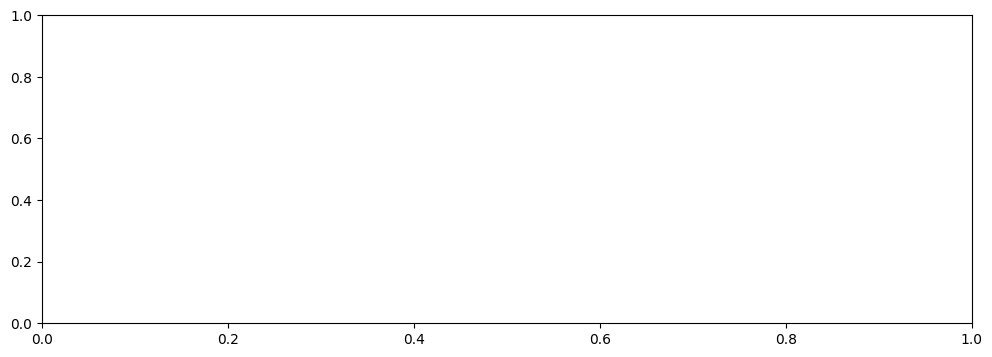

In [ ]:
fig, ax = plt.subplots(figsize=(12,4))
births_by_date.plot(ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

#Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

#Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))


Error in callback <function _draw_all_if_interactive at 0x0000024BD82A7CE0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

<Figure size 1200x400 with 1 Axes>

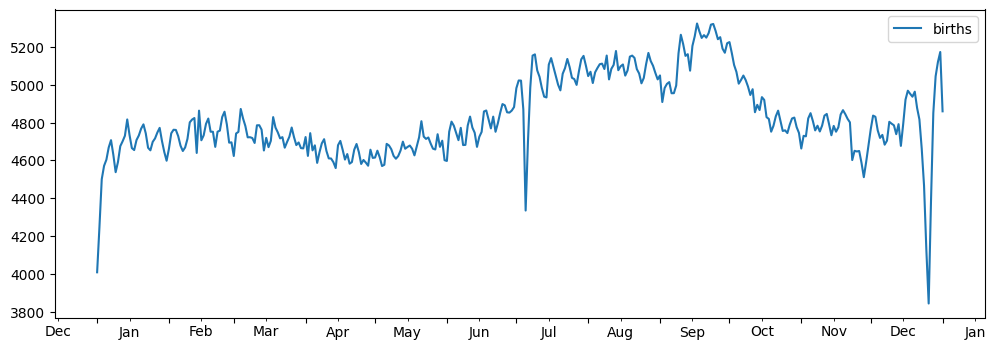

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

# TRANSDATA

AttributeError: 'Axes' object has no attribute 'transFigure'

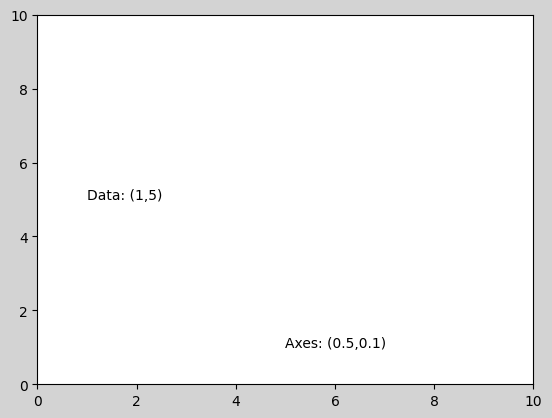

In [ ]:
fig, ax = plt.subplots(facecolor = 'lightgray')
ax.axis([0, 10, 0, 10])

#transform ax.transDta is default but we,ll spexcify it anyway
ax.text(1,5, "Data: (1,5)", transform = ax.transData)
ax.text(0.5,0.1, "Axes: (0.5,0.1)", transform = ax.transAxes)
ax.text(0.2,0.2, "Data: (0.2,0.2)", transform = ax.transFigure)

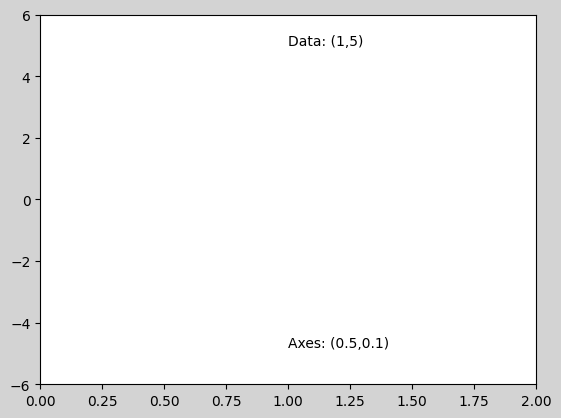

In [ ]:
ax.set_xlim(0, 2)
ax.set_ylim(-6,6)
fig

# Arrows and Annotation

Text(2, -6, 'local minimum')

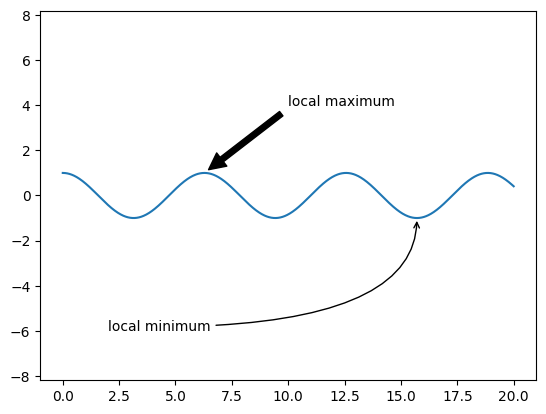

In [ ]:
fig, ax = plt.subplots()

x = np.linspace(0, 20, 1000)
ax.plot(x, np.cos(x))
ax.axis('equal') 

# xy point in data coordinates(Where the arrow points), xytext = where the text should appear, arrowprops = dictionary controlling arrow style.
ax.annotate('local maximum', xy=(6.28, 1), xytext=(10, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(2, -6),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

#Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

#Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

#Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400)

(3600.0, 5400.0)

Error in callback <function _draw_all_if_interactive at 0x0000024BD82A7CE0> (for post_execute), with arguments args (),kwargs {}:


ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

ConversionError: Failed to convert value(s) to axis units: '2012-1-1'

<Figure size 1200x400 with 1 Axes>

# Customizing Ticks